In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

In [5]:
train = pd.read_csv('train.txt',sep=';',names=['Line','Emotion'])
test = pd.read_csv('test.txt',sep=';',names=['Line','Emotion'])
valid = pd.read_csv('val.txt',sep=';',names=['Line','Emotion'])

In [6]:
train

,Line,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [7]:
test

,Line,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [8]:
valid

,Line,Emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


C:\Users\vedmi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


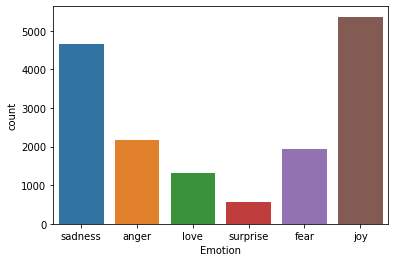

C:\Users\vedmi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


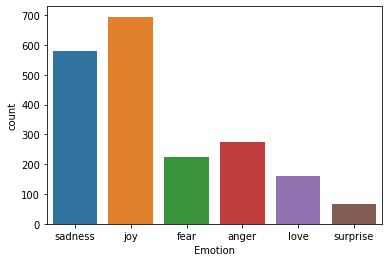

C:\Users\vedmi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


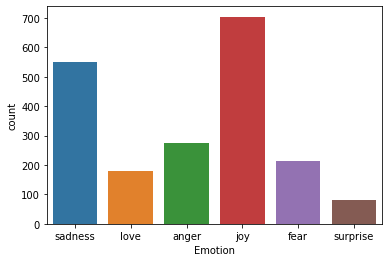

In [9]:
sns.countplot(train.Emotion)
plt.show()
sns.countplot(test.Emotion)
plt.show()
sns.countplot(valid.Emotion)
plt.show()

In [10]:
sets = [train,test,valid]
for df in sets:
    df['Len'] = df.Line.apply(lambda x:len(x))
    emt = {'sadness':0,'anger':1,'love':2,'surprise':3,'fear':4,'joy':5}
    df['Emotion']=df['Emotion'].map(emt)


In [11]:
X = train['Line']
y_train = train['Emotion']

In [12]:
train.head()

,Line,Emotion,Len
0,i didnt feel humiliated,0,23
1,i can go from feeling so hopeless to so damned...,0,108
2,im grabbing a minute to post i feel greedy wrong,1,48
3,i am ever feeling nostalgic about the fireplac...,2,92
4,i am feeling grouchy,1,20


In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)
len(tokenizer.word_counts)

15212

In [14]:
from keras.preprocessing.sequence import pad_sequences
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [15]:
from tensorflow.keras.utils import to_categorical
y_train_final=to_categorical(y_train)


In [16]:
Xv = valid['Line']
yv = valid['Emotion']
Xv_final = tokenizer.texts_to_sequences(Xv)
Xv_pad = pad_sequences(Xv_final,maxlen=80,padding='post')
yv_final = to_categorical(yv)

In [17]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
hist = model.fit(X_train_pad,y_train_final,epochs=12,validation_data=(Xv_pad,yv_final))

Epoch 1/12
500/500 [==============================] - 312s 486ms/step - loss: 1.4527 - accuracy: 0.4171 - val_loss: 0.5860 - val_accuracy: 0.8110
Epoch 2/12
500/500 [==============================] - 218s 436ms/step - loss: 0.5039 - accuracy: 0.8302 - val_loss: 0.3180 - val_accuracy: 0.8840
Epoch 3/12
500/500 [==============================] - 217s 435ms/step - loss: 0.2924 - accuracy: 0.8951 - val_loss: 0.2494 - val_accuracy: 0.9120
Epoch 4/12
500/500 [==============================] - 214s 428ms/step - loss: 0.2088 - accuracy: 0.9270 - val_loss: 0.2079 - val_accuracy: 0.9195
Epoch 5/12
500/500 [==============================] - 215s 430ms/step - loss: 0.1659 - accuracy: 0.9380 - val_loss: 0.1686 - val_accuracy: 0.9295
Epoch 6/12
500/500 [==============================] - 216s 433ms/step - loss: 0.1223 - accuracy: 0.9568 - val_loss: 0.1969 - val_accuracy: 0.9245
Epoch 7/12
500/500 [==============================] - 215s 431ms/step - loss: 0.0997 - accuracy: 0.9633 - val_loss: 0.1792 -

In [20]:
X_test=test['Line']
y_test=test['Emotion']
X_test_final=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_final,maxlen=80,padding='post')
y_test_final=to_categorical(y_test)
model.evaluate(X_test_pad,y_test_final)

63/63 [==============================] - 7s 112ms/step - loss: 0.2041 - accuracy: 0.9285


[0.20412926375865936, 0.9284999966621399]

In [23]:
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test_pad)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       581
           1       0.95      0.92      0.94       275
           2       0.85      0.76      0.80       159
           3       0.78      0.82      0.80        66
           4       0.90      0.88      0.89       224
           5       0.94      0.95      0.94       695

    accuracy                           0.93      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.93      0.93      0.93      2000



In [26]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(sentence_padded))
  print("The emotion predicted is",ans)

def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [28]:
predict(str(input('Enter a sentence : ')))

The emotion predicted is surprise
